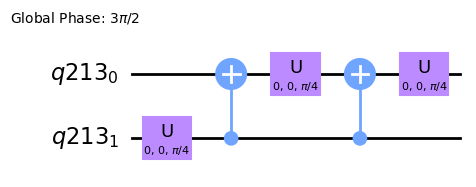

In [52]:
import math
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

a, b, c, d = 0.5j, 0, -0.7, 0.3j
desired_vector = [a * c, -1j * b * d, -1j * b * d, b * c]
desired_vector = np.array(desired_vector) / np.linalg.norm(desired_vector)
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.initialize(desired_vector)
from qiskit import transpile

transp = transpile(qc, basis_gates=["u", "cx"], optimization_level=3)
transp.draw("mpl")

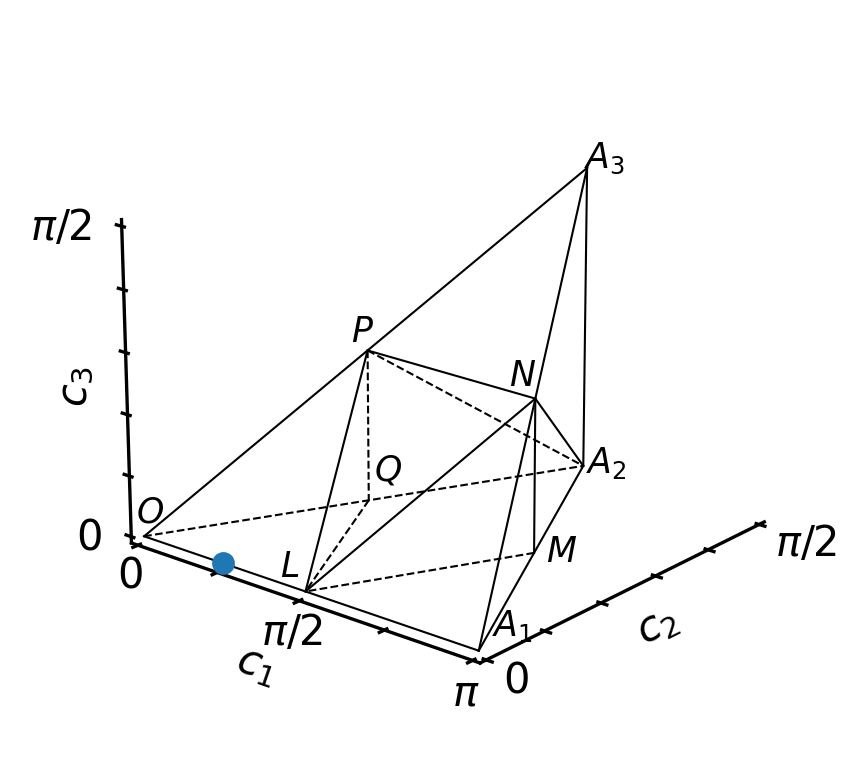

In [53]:
from weylchamber import c1c2c3, WeylChamber
from qiskit.quantum_info import Operator

w = WeylChamber()
coord = c1c2c3(Operator(transp).data)
w.add_point(*coord)
w.plot()

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

data, ancilla, meas = QuantumRegister(3), QuantumRegister(2), ClassicalRegister(2)
qc = QuantumCircuit(data, ancilla, meas)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(1, 4)
qc.cx(2, 4)
# qc.measure(ancilla, meas)
qc.draw()

q2_0: ──■─────────────────
        │                 
q2_1: ──┼────■────■───────
        │    │    │       
q2_2: ──┼────┼────┼────■──
      ┌─┴─┐┌─┴─┐  │    │  
q3_0: ┤ X ├┤ X ├──┼────┼──
      └───┘└───┘┌─┴─┐┌─┴─┐
q3_1: ──────────┤ X ├┤ X ├
                └───┘└───┘
c1: 2/════════════════════

In [47]:
from sympy.physics.quantum.state import Ket
from sympy import symbols

symbs = symbols("x:32")
# ket = Ket(a,b,c,d,e,f,g,h)
# print(ket)

In [49]:
import numpy as np

ket = np.array([*symbs])
ket.shape = (32, 1)

In [51]:
from qiskit.quantum_info import Operator

op = Operator(qc)
print(op.to_matrix() * ket)

[[1.0*x0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1.0*x31]]


In [6]:
input_circuit = QuantumCircuit(5)
input_circuit.x(0)
input_circuit.x(1)
input_circuit.x(2)

# get state_vector, apply 0
# input_op =

In [7]:
# evaluate on an input state
from qiskit.quantum_info import Operator

op = Operator(qc)

# input state
from qiskit.quantum_info import Statevector

sv = Statevector.from_instruction(input_circuit)
sv = sv.evolve(op)
sv.draw("latex")

<IPython.core.display.Latex object>

In [9]:
# get output, and ancilals back
from qiskit.quantum_info import partial_trace

output = partial_trace(sv, [3, 4]).to_statevector()
control = partial_trace(sv, [0, 1, 2]).to_statevector()
output.draw("latex")
control.draw("latex")

#
# assert input == output

<IPython.core.display.Latex object>